## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""

'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

C:\Users\useR\Anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\useR\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\useR\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\useR\

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330 

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 32

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 15s 309us/step - loss: 1.9313 - acc: 0.2906 - val_loss: 1.8217 - val_acc: 0.3354
Epoch 2/100
50000/50000 [==============================] - 13s 263us/step - loss: 1.7353 - acc: 0.3721 - val_loss: 1.6703 - val_acc: 0.4012
Epoch 3/100
50000/50000 [==============================] - 13s 269us/step - loss: 1.6508 - acc: 0.4070 - val_loss: 1.6005 - val_acc: 0.4271
Epoch 4/100
50000/50000 [==============================] - 13s 264us/step - loss: 1.5917 - acc: 0.4296 - val_loss: 1.5957 - val_acc: 0.4269
Epoch 5/100
50000/50000 [==============================] - 13s 268us/step - loss: 1.5469 - acc: 0.4435 - val_loss: 1.5736 - val_acc: 0.4438
Epoch 6/100
50000/50000 [==============================] - 13s 258us/step - loss: 1.5110 - acc: 0.4582 - val_loss: 1.5157 - val_acc: 0.4631
Epoch 7/100
50000/50000 [==============================] - 13s 262us/step - loss: 1.4827 - acc: 0.4678 - val_l

Epoch 59/100
50000/50000 [==============================] - 12s 243us/step - loss: 0.8643 - acc: 0.6881 - val_loss: 1.8269 - val_acc: 0.4853
Epoch 60/100
50000/50000 [==============================] - 12s 242us/step - loss: 0.8596 - acc: 0.6901 - val_loss: 1.8209 - val_acc: 0.4826
Epoch 61/100
50000/50000 [==============================] - 12s 242us/step - loss: 0.8515 - acc: 0.6914 - val_loss: 1.8277 - val_acc: 0.4895
Epoch 62/100
50000/50000 [==============================] - 12s 241us/step - loss: 0.8419 - acc: 0.6943 - val_loss: 1.8302 - val_acc: 0.4855
Epoch 63/100
50000/50000 [==============================] - 12s 242us/step - loss: 0.8383 - acc: 0.6970 - val_loss: 1.8357 - val_acc: 0.4872
Epoch 64/100
50000/50000 [==============================] - 12s 243us/step - loss: 0.8350 - acc: 0.6979 - val_loss: 1.8696 - val_acc: 0.4871
Epoch 65/100
50000/50000 [==============================] - 12s 242us/step - loss: 0.8292 - acc: 0.7017 - val_loss: 1.9048 - val_acc: 0.4752
Epoch 66/100


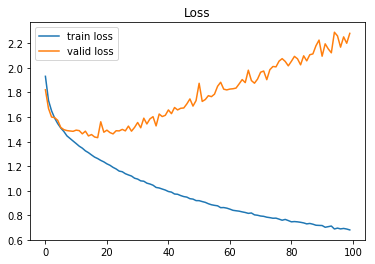

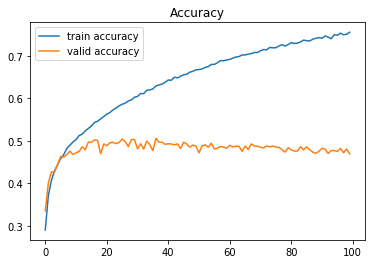

In [11]:
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()